In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset
path="/content/drive/MyDrive/Lab1/Insurance.csv"
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
#Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#statistical measures of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


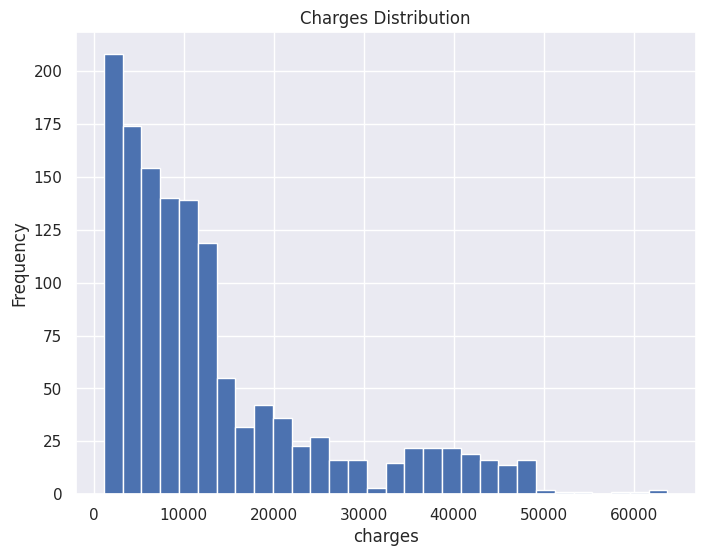

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=30)
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.title('Charges Distribution')
plt.show()

<Figure size 500x500 with 0 Axes>

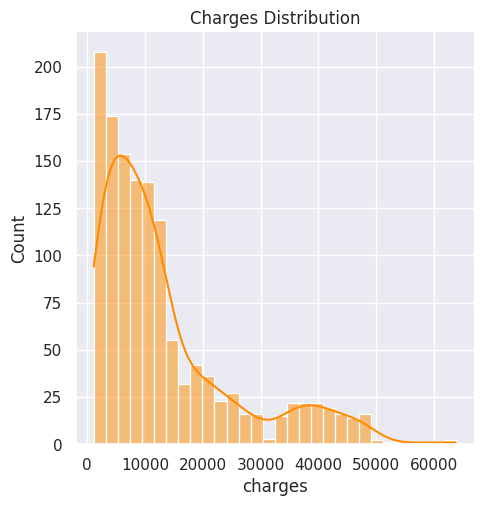

In [ ]:
#Distribution of cost
sns.set()
plt.figure(figsize=(5,5))
sns.displot(df['charges'], color='darkorange', kde=True)
plt.title('Charges Distribution')
plt.show()


<Figure size 500x500 with 0 Axes>

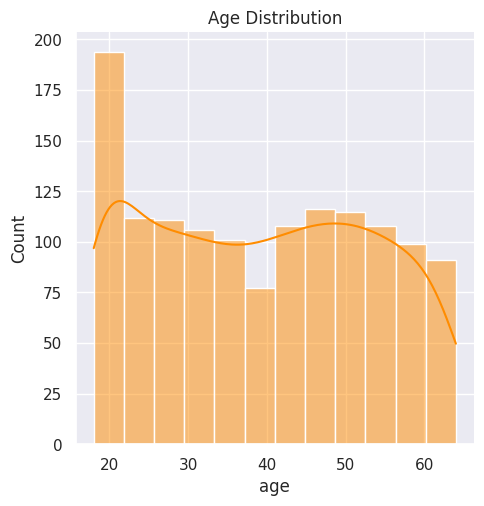

In [ ]:
#graphical distribution of Age
sns.set()
plt.figure(figsize=(5,5))
sns.displot(df['age'], color='darkorange',kde=True)
plt.title('Age Distribution')
plt.show()

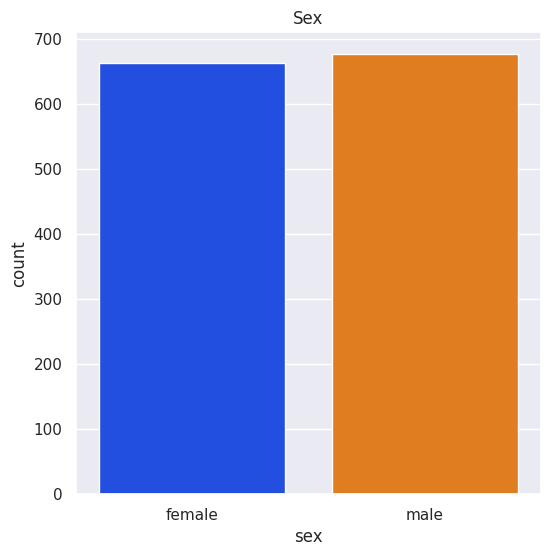

In [ ]:
#graphical distribution of sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df, palette='bright')
plt.title('Sex')
plt.show()

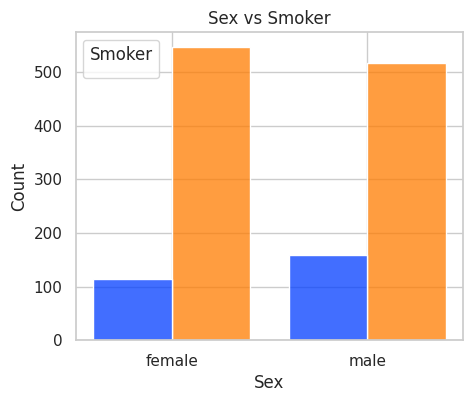

In [ ]:
#sex vs smoker
sns.set(style="whitegrid")
plt.figure(figsize=(5, 4))
sns.histplot(data=data, x="sex", hue="smoker", multiple="dodge", shrink=0.8, palette='bright', legend=True)
plt.title("Sex vs Smoker")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.show()

In [ ]:
#Number of females and males
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

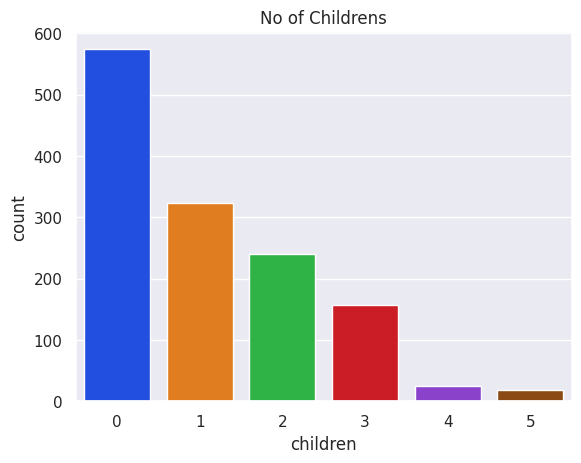

In [ ]:
#Number of children
sns.set()
sns.countplot(x='children',data=df,palette='bright')
plt.title('No of Childrens')
plt.show()

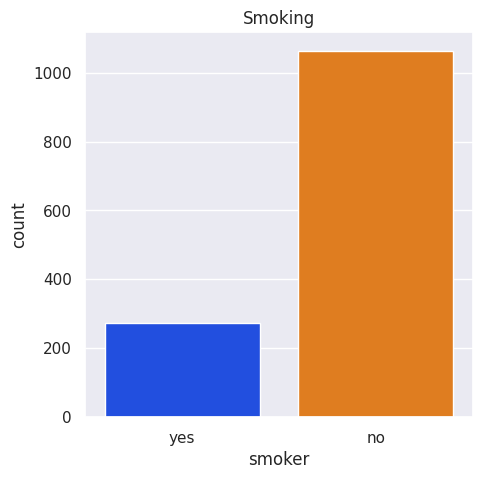

In [ ]:
#Number of smokers
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df, palette='bright')
plt.title('Smoking')
plt.show()

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Figure size 500x500 with 0 Axes>

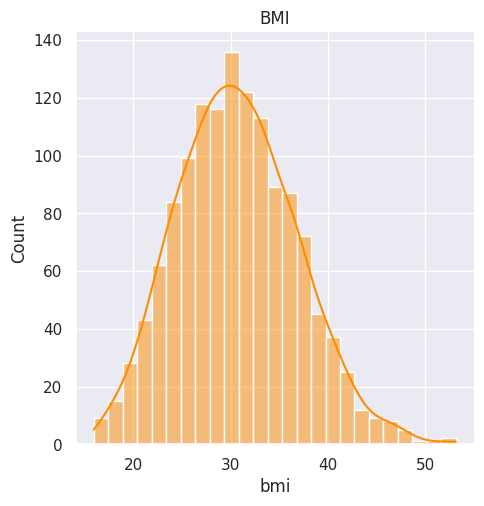

In [ ]:
#bmi distribution(normal range 18.5-24.9)
sns.set()
plt.figure(figsize=(5,5))
sns.displot(x='bmi',data=df, color='darkorange', kde=True)
plt.title('BMI')
plt.show()

In [ ]:
data_female = data[data['sex'] == 'female']

# Create a new figure for the female histogram
plt.figure(figsize=(8, 6))
plt.hist(data_female['bmi'], bins=30, color='blue', alpha=0.7)
plt.title("BMI distribution for Females")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()
# Filter data for males
data_male = data[data['sex'] == 'male']

# Create a new figure for the male histogram
plt.figure(figsize=(8, 6))
plt.hist(data_male['bmi'], bins=30, color='orange', alpha=0.7)
plt.title("BMI distribution for Males")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

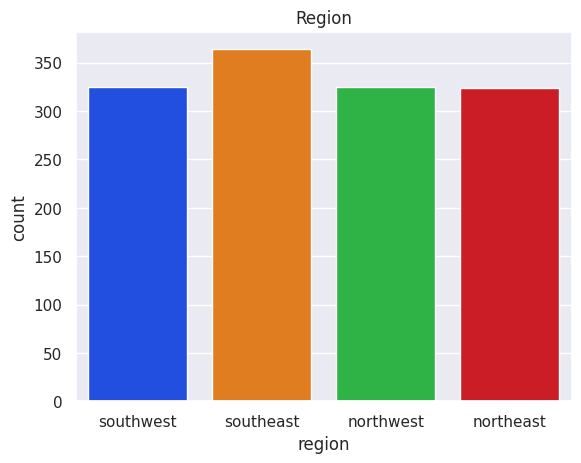

In [ ]:
#region
sns.set()
sns.countplot(x='region',data=df, palette='bright')
plt.title('Region')
plt.show()

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:

#Encode categorical features
df.replace({'sex':{'male':0,'female':1}},inplace=True)
# smoker columsn

df.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

**Splitting the feature and target**

In [ ]:
# Split the dataset into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
# Convert categorical variables to numerical using one-hot encoding
#df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
scaler = StandardScaler()
num_features = ['age', 'bmi', 'children']
data[num_features] = scaler.fit_transform(data[num_features])


In [ ]:
# Splitting the data into train data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1338, 6)
(1070, 6)
(268, 6)


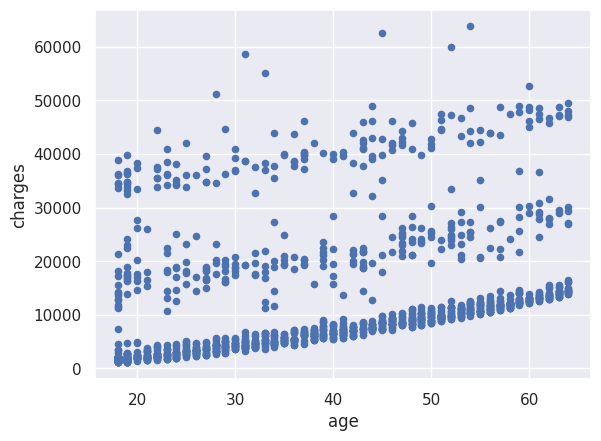

In [ ]:
#Visualize the data for age
df.plot(kind='scatter', x="age", y='charges')
plt.show()

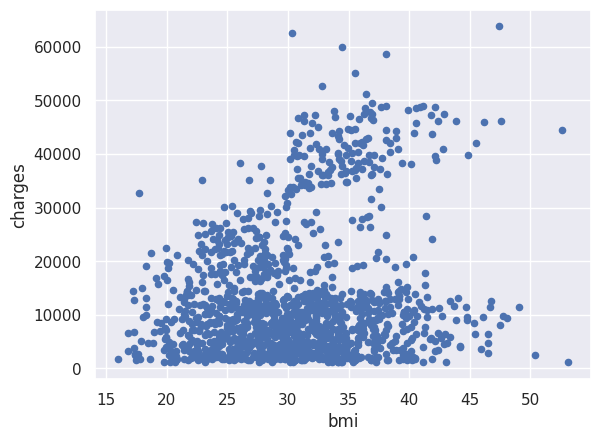

In [ ]:
#Visualize the bmi data
df.plot(kind='scatter', x="age", y='charges')
plt.show()

Model training

In [ ]:
#Select a linear model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X, y)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
training_prediction = model.predict(X_train)

In [ ]:
#R-squared value
r2_train = metrics.r2_score(y_train,training_prediction)
print(r2_train)

0.7512580944694703


In [ ]:
# prediciting the test data
test_predicition = model.predict(X_test)
r2_test = metrics.r2_score(y_test,test_predicition)
print(r2_test)

0.7469081295022835


In [ ]:
input_data = (37,1,30.8,2,1,0)

#chaning it to numpy array
input_data_as_array = np.asarray(input_data)

#reshapping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])

The person will get insurance money =  7917.181127533055


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
